# Data load

In [10]:
# library import 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error

from time import time

In [18]:
# data set read

train = pd.read_csv('/Users/krc/TIL/Mini_PJT/data/train_V2.csv')

test = pd.read_csv('/Users/krc/TIL/Mini_PJT/data/test_V2.csv')

submission = pd.read_csv('/Users/krc/TIL/Mini_PJT/data/sample_submission_V2.csv')

In [12]:
import matplotlib.font_manager

# matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("Nanum")])

# 폰트 설정
plt.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

# 전처리

In [19]:
# 불필요하다 판단되는 column 제거

train.drop(['Id', 'matchId', 'groupId', 'numGroups'], axis=1, inplace=True)
train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [20]:
# 결측치 확인 & 처리

train.isnull().sum()
train.dropna(axis=0, inplace=True)
train.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# EDA

## 얻은 무기의 수와 생존(승률)과 연관이 있는지 알아보자

<AxesSubplot:ylabel='weaponsAcquired'>

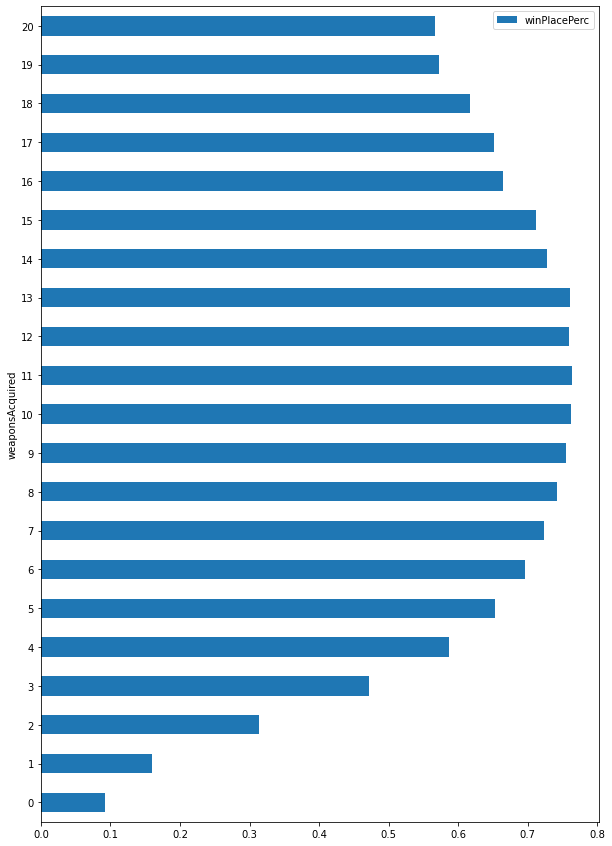

In [21]:
# 15개 이하의 데이터 취합, target(생존/승률) 평균치
wl = train[train.weaponsAcquired <= 20]
how = {
    "winPlacePerc" : np.mean
}
wl = wl.groupby('weaponsAcquired').agg( how )
# wl
fig = plt.figure(figsize=(10 ,15))
graph1 = fig.add_subplot(1,1,1)


wl.plot.barh(ax=graph1)

- 무기를 일정 기준치(약 4 ~ 18) 얻을 경우 승률이 올라가는걸 확인할 수 있다
- 승률이 올라간 기준치에서 추가적으로 데미지도 많이 줬는지 알아보자

In [22]:
from pandas.core.groupby import groupby
# train[train.weaponsAcquired <= 15].damageDealt.value_counts()
b = train[(train.weaponsAcquired <= 20) & (train.weaponsAcquired >= 5)]
weapons_dmg = b[['damageDealt', 'winPlacePerc']].groupby(b['weaponsAcquired']).mean()
weapons_dmg

,damageDealt,winPlacePerc
weaponsAcquired,,
5,176.102524,0.653519
6,193.109397,0.696562
7,204.981877,0.723188
8,212.475242,0.741634
9,217.752652,0.754816
10,219.083692,0.761477
11,217.721661,0.764164
12,226.927748,0.759424
13,234.564495,0.761287


- 일정 기준치 안에서 16개 이상일때부터 총 넣은 데미지가 급격하게 늘어났으나, 승률은 그전(15개 이하)이 더 좋은걸 확인할 수 있다.

/var/folders/5_/m46vm5f115d6c9gp5dllglxh0000gn/T/ipykernel_4541/3866592605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Damage'] = b['damageDealt'].map(func)


<AxesSubplot:xlabel='Damage'>

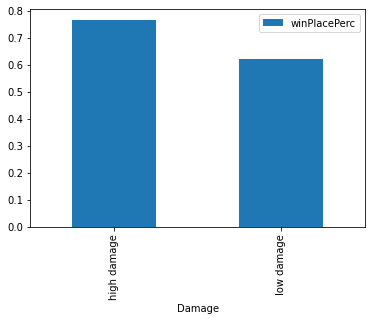

In [23]:
b.damageDealt.describe() # 중앙값 132
b[b.damageDealt <= 132]

def func(x):
    if x <= 132:
        return "low damage"
    else:
        return "high damage"

b['Damage'] = b['damageDealt'].map(func)

how = {
    "winPlacePerc" : np.mean
}
t = b.groupby('Damage').agg( how )
t.plot.bar()

- 그렇지만 무기 습득 개수와 별개로 high damage가 상대적으로 target과 연관이 있다는걸 확인할 수 있다

## 기절/킬 과 연관이 있는지 알아보자

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


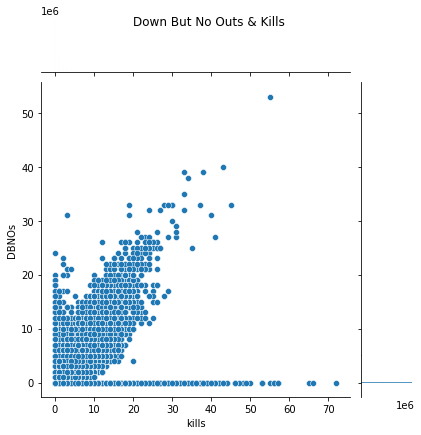

In [24]:
# kills 과 DBNOs는 연관이 높아 보인다
np.random.seed(0)
sns.jointplot(x="kills", y="DBNOs", data=train)
plt.suptitle("Down But No Outs & Kills")
plt.show()

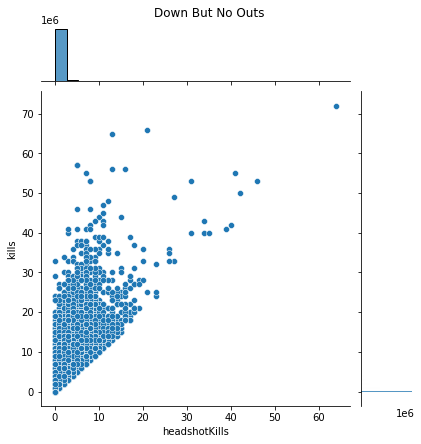

In [25]:
# headshotKills와 Kills값도 연관있어 보인다
train.DBNOs.unique()
train.DBNOs.value_counts()

np.random.seed(0)
sns.jointplot(x="headshotKills", y="kills", data=train)
plt.suptitle("Down But No Outs", y=1.02)
plt.show()

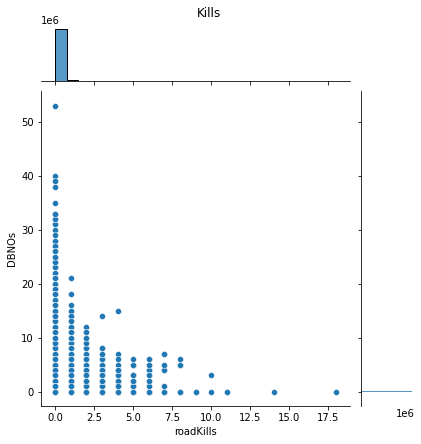

In [26]:
# roadkills과 DBNOs값은 연관관계가 딱히 좋아 보이진 않는다22
np.random.seed(0)
sns.jointplot(x="roadKills", y="DBNOs", data=train)
plt.suptitle("Kills", y=1.02)
plt.show()

<AxesSubplot:>

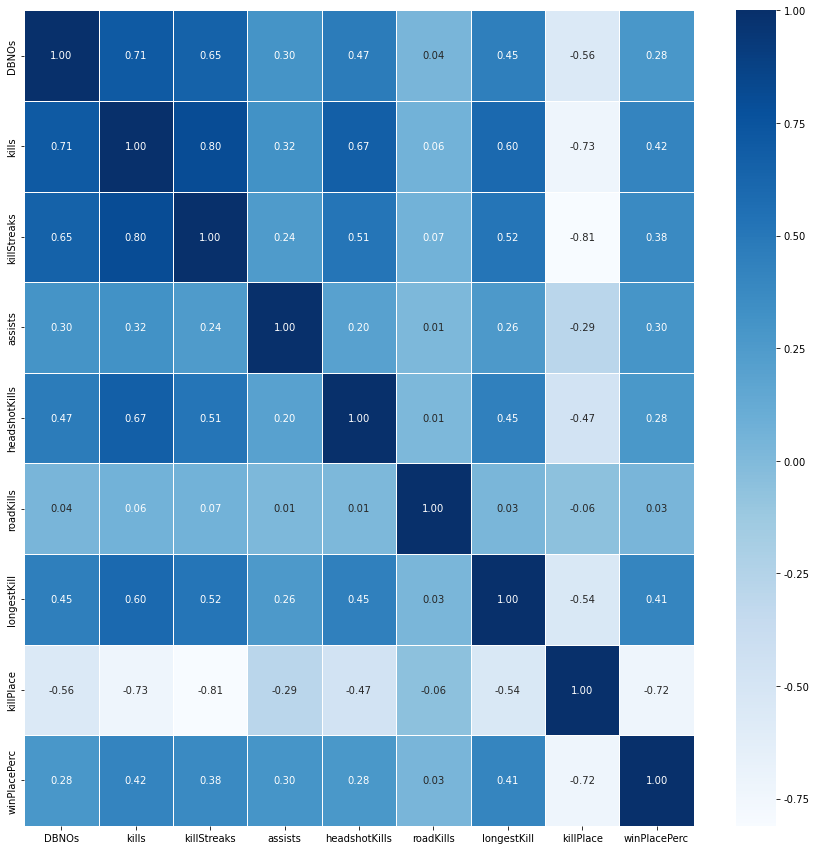

In [27]:
k = train[['DBNOs', 'kills', 'killStreaks', 'assists', 'headshotKills', 'roadKills', 'longestKill', 'killPlace', 'winPlacePerc']]
plt.figure(figsize=(15,15))
sns.heatmap(data = k.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- 상관관계가 전체적으로 낮지만, 그중 kill이 높은편에 속한다고 추론해볼 수 있다
- longestKill의 경우 어떠한 관계를 보여주는지 확인해 보자

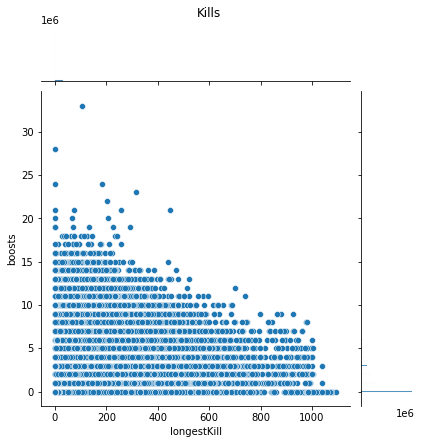

In [28]:
# 거리의 영향은 받으나, 전반적으로 boosts를 하는걸로 보인다
np.random.seed(0)
sns.jointplot(x="longestKill", y="boosts", data=train)
plt.suptitle("Kills", y=1.02)
plt.show()

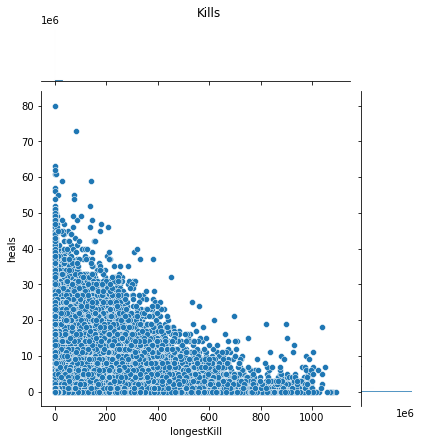

In [29]:
# 하지만, heals의 경우에는 거리의 영향이 상대적으로 큰것으로 보인다
np.random.seed(0)
sns.jointplot(x="longestKill", y="heals", data=train)
plt.suptitle("Kills", y=1.02)
plt.show()

<AxesSubplot:>

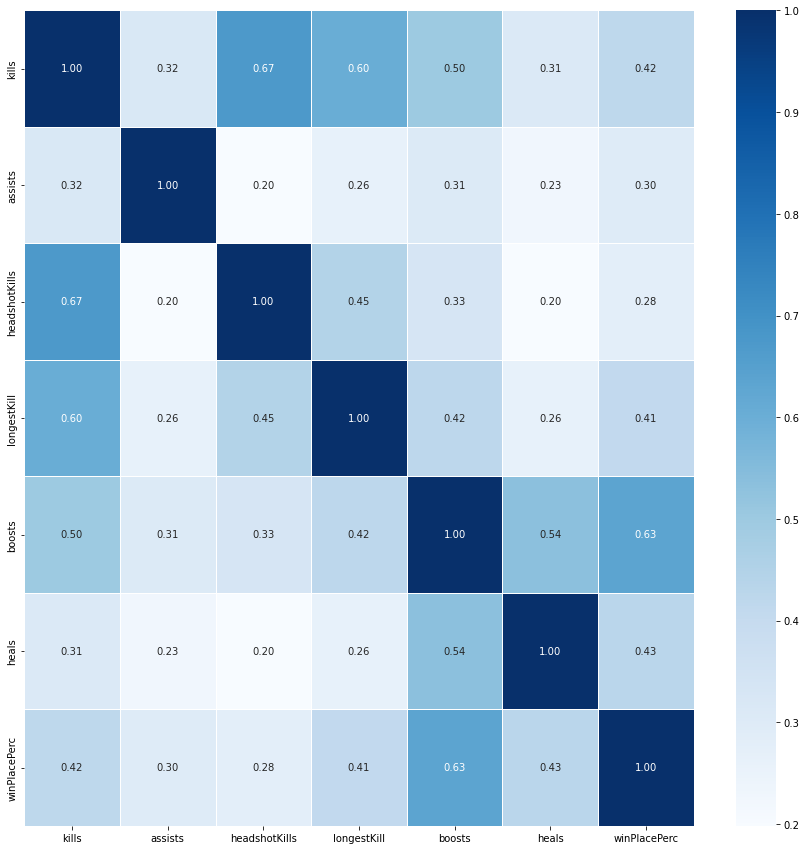

In [30]:
k = train[['kills', 'assists', 'headshotKills', 'longestKill', 'boosts', 'heals', 'winPlacePerc']]
plt.figure(figsize=(15,15))
sns.heatmap(data = k.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- kill 은 매우 연관되어 있어 보이며, 예상외로 assists는 상대적으로 적은걸로 확인된다

또한, 우리가 찾아야 할 target 값이 kill보다 boosts가 상관관계가 높은걸 확인할 수 있다
- 그렇다면 다음은 생존과 관계여부에 대해서 확인해 보자

## 게임 특성상 진행될 수록 구역이 좁아들기 때문에, 이동 과 연관이 있는지 알아보자

In [31]:
# 이동수단중 탈것(ride), 수영(swim), 걷기(walk) 와 target값 관계 찾기
train[['rideDistance', 'swimDistance', 'walkDistance', 'winPlacePerc']].mean()
'''
rideDistance     606.115805
swimDistance       4.509323
walkDistance    1154.218119
winPlacePerc       0.472822
'''

train[['rideDistance', 'swimDistance', 'walkDistance', 'winPlacePerc']].describe() // 1

,rideDistance,swimDistance,walkDistance,winPlacePerc
count,4446965.0,4446965.0,4446965.0,4446965.0
mean,606.0,4.0,1154.0,0.0
std,1498.0,30.0,1183.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,155.0,0.0
50%,0.0,0.0,685.0,0.0
75%,0.0,0.0,1976.0,0.0
max,40710.0,3823.0,25780.0,1.0


In [32]:
e = train[['rideDistance', 'swimDistance', 'walkDistance', 'winPlacePerc']]
e.corr()

,rideDistance,swimDistance,walkDistance,winPlacePerc
rideDistance,1.000000,0.049448,0.310936,0.342915
swimDistance,0.049448,1.000000,0.167509,0.149607
walkDistance,0.310936,0.167509,1.000000,0.810888
winPlacePerc,0.342915,0.149607,0.810888,1.000000


<AxesSubplot:>

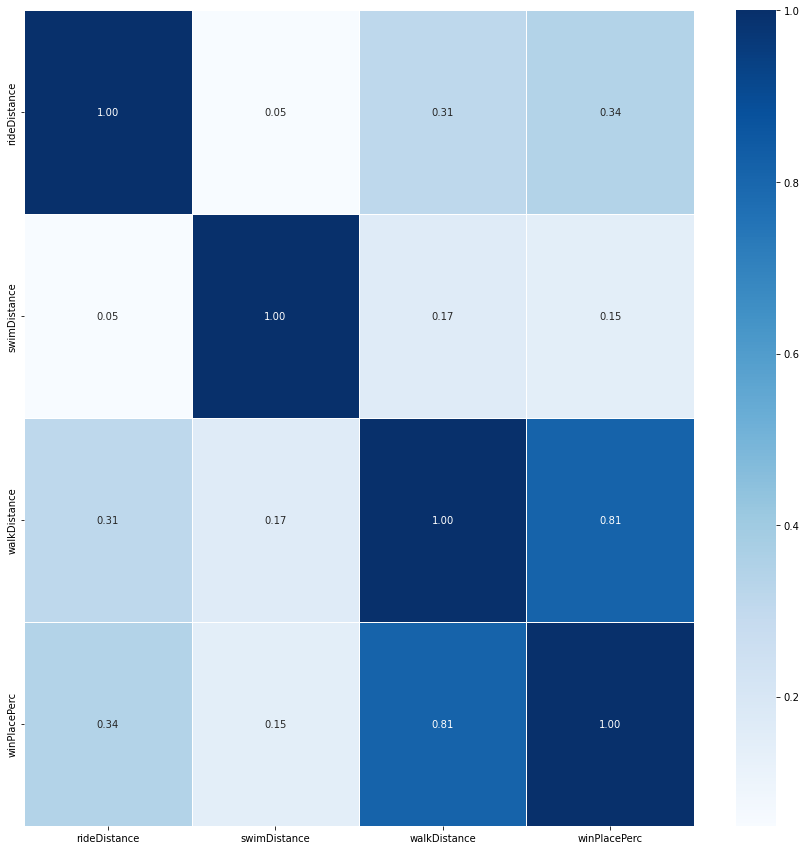

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(data = e.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- 이동수단 3총사 중에서 걸어가는게 제일(매우) 관계가 높은것으로 보아 다른 이동수단 보다는 걸어가는것이 생존에 더 용이하다고 추론할 수 있다

다음으로 안전하다고 볼수 있는건 탈것을 통해서 이동할때, 그다음 상대적으로 제일 위험하다고 볼수 있는 '수영' 순이다

## 마지막으로 이전 heatmap에서 확인되었던 부스트/힐링 즉, 생존 아이템과 연관이 얼마나 있는지 알아보자

In [34]:
train.boosts.value_counts()
'''
0     2521323
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
21          4
20          3
24          2
33          1
28          1
23          1
22          1
'''
help = train[['heals', 'winPlacePerc']].groupby(train['boosts']).mean()
help

,heals,winPlacePerc
boosts,,
0,0.259775,0.301320
1,1.685966,0.561017
2,2.465865,0.682152
3,3.381549,0.776169
4,3.996705,0.831251
5,4.541253,0.867935
6,4.990187,0.894765
7,5.348217,0.915358
8,5.652040,0.928498


- 1개 이상부터 반 이상의 관계를 보여주며 급격히 높아지는걸 확인 할 수 있다.

따라서, boosts아이템과는 관계가 아주 높다고 보여진다.

다만, 밑에서 세번째 row의 경우 주변과 다르게 매우 낮은수치인것을 확인할 수 있다

In [35]:
train[train.boosts == 24]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1465177,0,24,746.3,0,4,1,2,1415,7,1,...,0,2175.0,0,0.0,0,0,3650.0,4,1562,0.9663
3979434,0,24,0.0,0,0,1,4,0,0,0,...,0,0.0,0,0.0,0,0,267.3,8,0,0.0000


- 아주 높은구간에서 특이하게 반 이하로 떨어진 승률을 확인해 보니, 2개중 1개는 높지만 한개가 0으로 평균값때문에 떨어진걸로 확인된다. 

추가적으로 첫번째 row는 왜이렇게 낮은지 확인해 보자

/var/folders/5_/m46vm5f115d6c9gp5dllglxh0000gn/T/ipykernel_4541/1550737937.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boo['winner'] = boo['winPlacePerc'].map(func)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='count'>

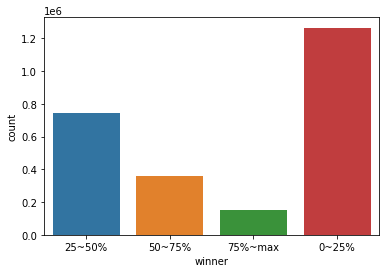

In [36]:
boo = train[train.boosts == 0]
# boo # 2521323
boo[['boosts', 'winPlacePerc']].winPlacePerc.describe() /10
'''
count    252132.300000
mean          0.030132
std           0.024268
min           0.000000
25%           0.010420
50%           0.025000
75%           0.045650
max           0.100000
'''


def func(x):
    if x <= 0.25:
        return '0~25%'
    elif x <= 0.5:
        return '25~50%'
    elif x <= 0.75:
        return '50~75%'
    else:
        return '75%~max'

boo['winner'] = boo['winPlacePerc'].map(func)

boo1 = boo.winner.value_counts() #.plot.bar()

sns.countplot('winner', data=boo)

- 위에서도 확인했듯이 매우 높은 분포와 분포내에서 낮은 승률을 보여지고 있는것으로 확인된다

-- 따라서 지금까지 확인되는것으로는 walkDistance와 boosts가 가장 관계가 높았으며, 그 이후로는 kill로 확인된다


## 추가적으로 관계가 없는것도 확인해보자

<AxesSubplot:>

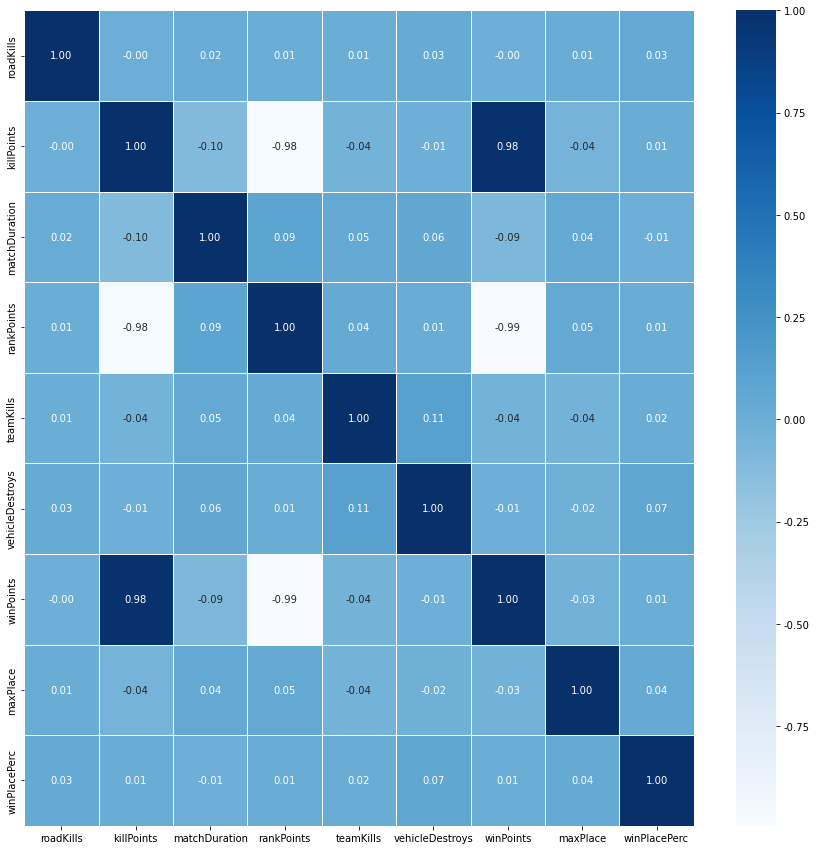

In [38]:
k = train[['roadKills', 'killPoints', 'matchDuration', 'matchType', 'rankPoints', 'teamKills', 'vehicleDestroys', 'winPoints', 'maxPlace', 'winPlacePerc']]
plt.figure(figsize=(15,15))
sns.heatmap(data = k.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')